In [9]:
import pandas as pd
from sqlalchemy import create_engine

from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import wordcloud

In [10]:
def count_words(messages):
    num_words_per_message = messages.apply(lambda x: len(x.split(' ')))
    return num_words_per_message.median()

In [11]:
engine = create_engine('sqlite:///../data/DisasterResponse.db')
messages = pd.read_sql_table('Message', engine)
messages_tokens = pd.read_sql_table('MessageTokens', engine)
messages_cats_wide = pd.read_sql_table('CorpusWide', engine)
messages_cats_long = pd.read_sql_table('MessageCategoryLong', engine)

messages_wide = messages.merge(messages_cats_wide, on='message_id')
messages_long = messages.merge(messages_cats_long, on='message_id')

In [12]:
messages_long

,message_id,message,original,genre,num_words,category
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13,related
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9,related
2,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9,aid_related
3,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9,other_aid
4,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9,weather_related
...,...,...,...,...,...,...
82849,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,23,related
82850,30264,"Some 2,000 women protesting against the conduc...",None,news,31,related
82851,30264,"Some 2,000 women protesting against the conduc...",None,news,31,aid_related
82852,30264,"Some 2,000 women protesting against the conduc...",None,news,31,military


In [13]:
messages.head()

,message_id,message,original,genre,num_words
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,6
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,13
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,12


In [14]:
messages['num_words'] = messages.message.apply(lambda x: len(x.split())).to_frame(name='num_words')
messages

,message_id,message,original,genre,num_words
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,13
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,9
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,6
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,13
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,12
...,...,...,...,...,...
26139,30261,The training demonstrated how to enhance micro...,None,news,21
26140,30262,A suitable candidate has been selected and OCH...,None,news,22
26141,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,23
26142,30264,"Some 2,000 women protesting against the conduc...",None,news,31


In [15]:
num_msgs_per_cat = messages_long.category.value_counts().rename_axis('category'). \
    reset_index(name='num_msgs').sort_values('category')
num_msgs_per_cat

,category,num_msgs
28,aid_centers,309
1,aid_related,10822
15,buildings,1327
27,clothing,403
25,cold,527
18,death,1190
3,direct_report,5055
7,earthquake,2449
24,electricity,532
31,fire,282


In [16]:
word_counts_by_category = messages_long.groupby('category').message \
    .agg(lambda x: count_words(x)).reset_index(name='num_words').sort_values('category')
word_counts_by_category

,category,num_words
0,aid_centers,26.0
1,aid_related,24.0
2,buildings,26.0
3,clothing,24.0
4,cold,26.0
5,death,28.0
6,direct_report,20.0
7,earthquake,20.0
8,electricity,24.0
9,fire,26.0


#### Top Unigrams - Overall

In [17]:
def get_ngrams_freqs(messages_array, n=1):
    vec = CountVectorizer(ngram_range=(n, n)).fit(messages_array)
    bag_of_words = vec.transform(messages_array)
    word_count = bag_of_words.sum(axis=0)
    words_freq = [(word, word_count[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq_df = pd.DataFrame(data = words_freq, columns = ['word','count'])
    return words_freq_df

In [19]:
unigrams_freqs = get_ngrams_freqs(messages_tokens.tokens_str)
bigrams_freqs = get_ngrams_freqs(messages_tokens.tokens_str, n=2)
trigrams_freqs = get_ngrams_freqs(messages_tokens.tokens_str, n=3)

In [20]:
unigrams_freqs[:20]

,word,count
0,water,3034
1,people,2998
2,food,2892
3,help,2649
4,need,2484
5,please,2041
6,earthquake,1915
7,area,1661
8,like,1522
9,would,1487


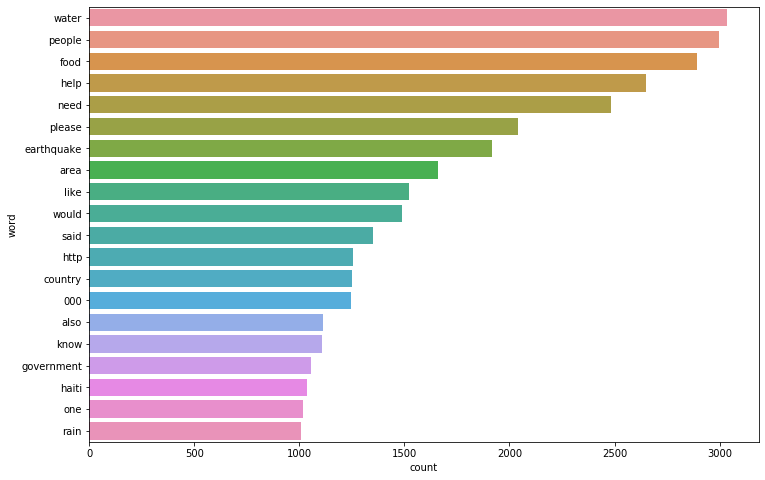

In [21]:
f1, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x='count', y='word', data=unigrams_freqs[:20]);

In [22]:
unigrams_freqs_dict = dict(zip(unigrams_freqs['word'], unigrams_freqs['count']))

In [23]:
uni_wordcloud = wordcloud.WordCloud(background_color ='white', 
                min_font_size = 10,
                max_words= 30).generate_from_frequencies(unigrams_freqs_dict) 

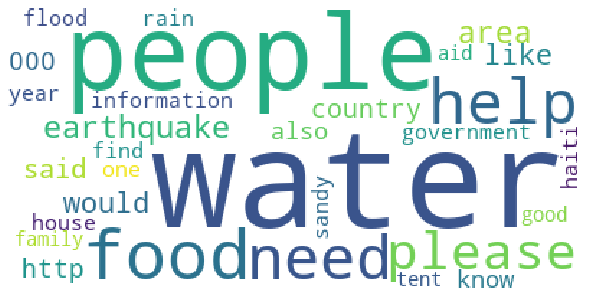

In [28]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(uni_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [27]:
uni_wordcloud.to_file('uni_wordcloud.png');

In [29]:
bigrams_freqs[:20]

,word,count
0,would like,894
1,http co,595
2,like know,439
3,need help,396
4,please help,366
5,food water,309
6,need food,303
7,port au,303
8,au prince,300
9,bit ly,292


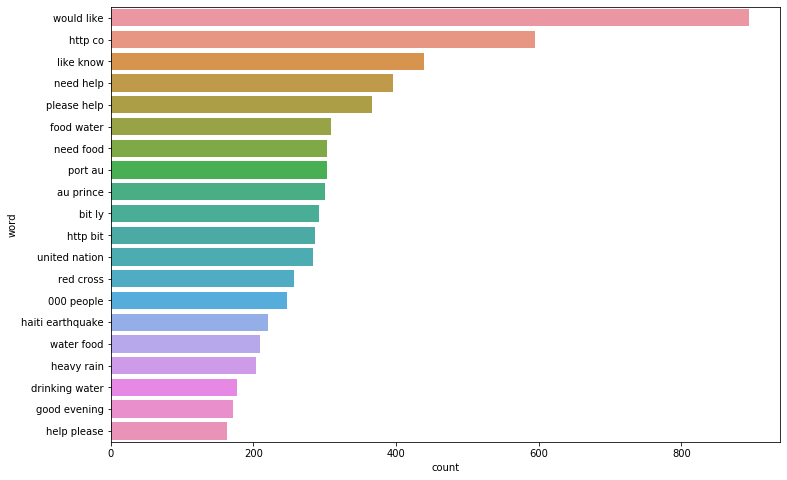

In [30]:
f2, ax2 = plt.subplots(figsize=(12, 8))
sns.barplot(x='count', y='word', data=bigrams_freqs[:20]);

In [31]:
bigrams_freqs_dict = dict(zip(bigrams_freqs['word'], bigrams_freqs['count']))
bigram_wordcloud = wordcloud.WordCloud(background_color ='white', 
                min_font_size = 10,
                max_words= 30).generate_from_frequencies(bigrams_freqs_dict)

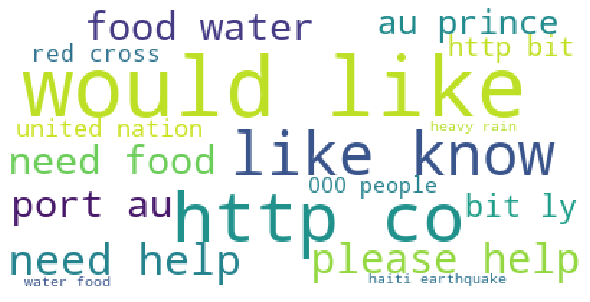

In [32]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(bigram_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [35]:
bigram_wordcloud.to_file('bi_wordcloud.png');

In [36]:
trigrams_freqs[:20]

,word,count
0,would like know,352
1,port au prince,299
2,http bit ly,286
3,need food water,114
4,would like information,104
5,need water food,70
6,croix de bouquet,61
7,sandy http co,61
8,non perishable food,60
9,would like find,54


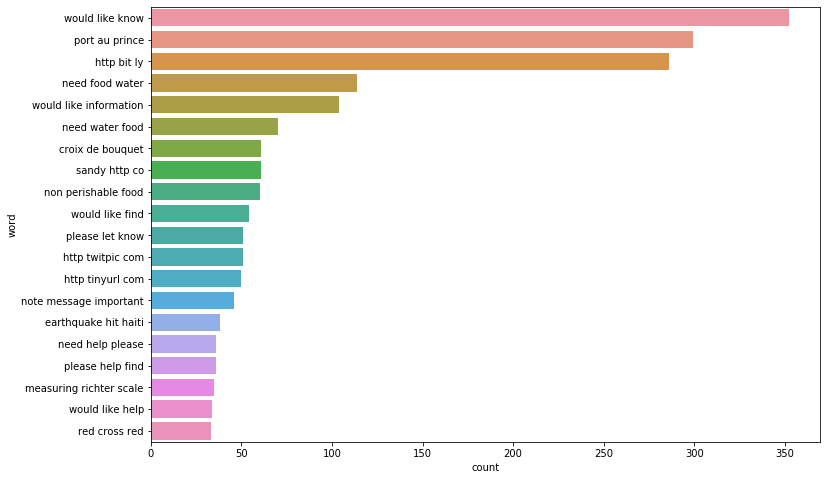

In [37]:
f3, ax3 = plt.subplots(figsize=(12, 8))
sns.barplot(x='count', y='word', data=trigrams_freqs[:20]);

In [38]:
trigrams_freqs_dict = dict(zip(trigrams_freqs['word'], trigrams_freqs['count']))
trigram_wordcloud = wordcloud.WordCloud(background_color ='white', 
                min_font_size = 10,
                max_words= 30).generate_from_frequencies(trigrams_freqs_dict) 

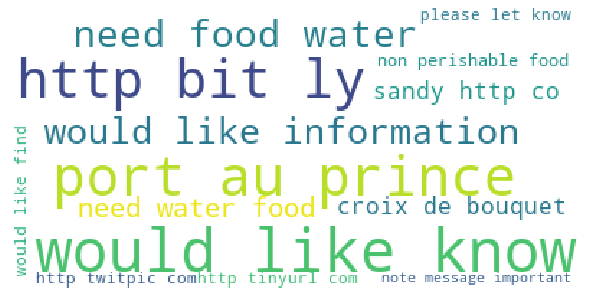

In [39]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(trigram_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

In [40]:
trigram_wordcloud.to_file('tri_wordcloud.png');

In [ ]:
from nltk.util import ngrams
def get_ngrams_freqs_2(messages_arrays, n=1):
    ngrams = ngrams(tokenized.split(), n)
    

In [52]:
from nltk.util import ngrams
import collections
ngrams = ngrams(messages_tokens.tokens.split(), 1)
ngramFreq = collections.Counter(ngrams)
ngramFreq.most_common(10)

[(('haiti',), 2),
 (('2',), 2),
 (('...',), 2),
 (('0',), 1),
 (('weather',), 1),
 (('update',), 1),
 (('cold',), 1),
 (('front',), 1),
 (('cuba',), 1),
 (('could',), 1)]

In [39]:
ngrams

<generator object ngrams at 0x7fd68d5f23d0>

In [26]:
CountVectorizer(ngram_range=(1, 1)).fit_transform(messages_tokens.tokens)

<26144x31915 sparse matrix of type '<class 'numpy.int64'>'
	with 356308 stored elements in Compressed Sparse Row format>

In [10]:
messages_tokens.head()

,message_id,tokens
0,2,weather update cold front cuba could pas haiti
1,7,hurricane
2,8,looking someone name
3,9,un report leogane 80 90 destroyed hospital st ...
4,12,say west side haiti rest country today tonight
